## Q1. What is an ensemble technique in machine learning?

Ans- ENSEMBLE TECHNIQUE:
1.Max voting
2.Averaging
3.Weighted Averaging
Max Voting
The max voting method is generally used for classification problems. In this technique, multiple models are used to make predictions for each data point. The predictions by each model are considered as a ‘vote’. The predictions which we get from the majority of the models are used as the final prediction.

For example, when you asked 5 of your colleagues to rate your movie (out of 5); we’ll assume three of them rated it as 4 while two of them gave it a 5. Since the majority gave a rating of 4, the final rating will be taken as 4. You can consider this as taking the mode of all the predictions.

The result of max voting would be something like this:

Colleague 1	Colleague 2	Colleague 3	Colleague 4	Colleague 5	Final rating
5	4	5	4	4	4
Sample Code:

Here x_train consists of independent variables in training data, y_train is the target variable for training data. The validation set is x_test (independent variables) and y_test (target variable) .

In [ ]:
#from sklearn.ensemble import VotingClassifier
#model1 = LogisticRegression(random_state=1)
#model2 = tree.DecisionTreeClassifier(random_state=1)
#model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
#model.fit(x_train,y_train)
#model.score(x_test,y_test)

Averaging
Similar to the max voting technique, multiple predictions are made for each data point in averaging. In this method, we take an average of predictions from all the models and use it to make the final prediction. Averaging can be used for making predictions in regression problems or while calculating probabilities for classification problems.

For example, in the below case, the averaging method would take the average of all the values.

i.e. (5+4+5+4+4)/5 = 4.4

Colleague 1	Colleague 2	Colleague 3	Colleague 4	Colleague 5	Final rating
5	4	5	4	4

In [ ]:
#model1 = tree.DecisionTreeClassifier()
#model2 = KNeighborsClassifier()
#model3= LogisticRegression()

#model1.fit(x_train,y_train)
#model2.fit(x_train,y_train)
#model3.fit(x_train,y_train)

#pred1=model1.predict_proba(x_test)
#pred2=model2.predict_proba(x_test)
#pred3=model3.predict_proba(x_test)

Weighted Average
This is an extension of the averaging method. All models are assigned different weights defining the importance of each model for prediction. For instance, if two of your colleagues are critics, while others have no prior experience in this field, then the answers by these two friends are given more importance as compared to the other people.

The result is calculated as [(5*0.23) + (4*0.23) + (5*0.18) + (4*0.18) + (4*0.18)] = 4.41.

Colleague 1	Colleague 2	Colleague 3	Colleague 4	Colleague 5	Final rating
weight	0.23	0.23	0.18	0.18	0.18
rating	5	4	5	4

In [ ]:
#model1 = tree.DecisionTreeClassifier()
#model2 = KNeighborsClassifier()
#model3= LogisticRegression()

#model1.fit(x_train,y_train)
#model2.fit(x_train,y_train)
#model3.fit(x_train,y_train)

#pred1=model1.predict_proba(x_test)
#pred2=model2.predict_proba(x_test)
#pred3=model3.predict_proba(x_test)

#finalpred=(pred1*0.3+pred2*0.3+pred3*0.4)

## Q2. Why are ensemble techniques used in machine learning?

Ans-There are two main reasons to use an ensemble over a single model, and they are related; they are:

1.Performance: An ensemble can make better predictions and achieve better performance than any single contributing model.
2.Robustness: An ensemble reduces the spread or dispersion of the predictions and model performance.

## Q3. What is bagging?

Ans-Bagging
Bootstrap Aggregating, also known as bagging, is a machine learning ensemble meta-algorithm designed to improve the stability and accuracy of machine learning algorithms used in statistical classification and regression. It decreases the variance and helps to avoid overfitting. It is usually applied to decision tree methods. Bagging is a special case of the model averaging approach. 

## Q4. What is boosting?

Ans-Boosting
Boosting is an ensemble modeling technique that attempts to build a strong classifier from the number of weak classifiers. It is done by building a model by using weak models in series. Firstly, a model is built from the training data. Then the second model is built which tries to correct the errors present in the first model. This procedure is continued and models are added until either the complete training data set is predicted correctly or the maximum number of models is added.

## Q5. What are the benefits of using ensemble techniques?

Ans-Ensemble methods offer several advantages over single models, such as improved accuracy and performance, especially for complex and noisy problems. They can also reduce the risk of overfitting and underfitting by balancing the trade-off between bias and variance, and by using different subsets and features of the data.

## Q6. Are ensemble techniques always better than individual models?

Ans-Ensemble methods have higher predictive accuracy, compared to the individual models. 2. Ensemble methods are very useful when there is both linear and non-linear type of data in the dataset; different models can be combined to handle this type of data.

## Q7. How is the confidence interval calculated using bootstrap?

## Q8. How does bootstrap work and What are the steps involved in bootstrap?

In [6]:
# import necessary libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# enable jupyter notebook's intellisense
%config IPCompleter.greedy=True

In [11]:
data = pd.read_csv('height-weight.csv')
print("\nInfo:")
display(data.info())
 # summary statistics
print("\nSummary statistics:")
display(data.describe())

# display first 5 rows
display(data.head())
      


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


None


Summary statistics:


,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [12]:
# Convert inches to centimeters
data["Height(cm)"] = data["Height"]*2.54

# Get summary statistics of Heights in centimeters
display(data['Height(cm)'].describe())

count     23.000000
mean     402.313913
std       49.559531
min      304.800000
25%      361.950000
50%      411.480000
75%      444.500000
max      464.820000
Name: Height(cm), dtype: float64

In [15]:
# Extract 500 random heights
heights = data['Height(cm)'].sample(23).reset_index(drop=True)

# Display Summary Statistics of heights in cm
display(heights.describe())

count     23.000000
mean     402.313913
std       49.559531
min      304.800000
25%      361.950000
50%      411.480000
75%      444.500000
max      464.820000
Name: Height(cm), dtype: float64

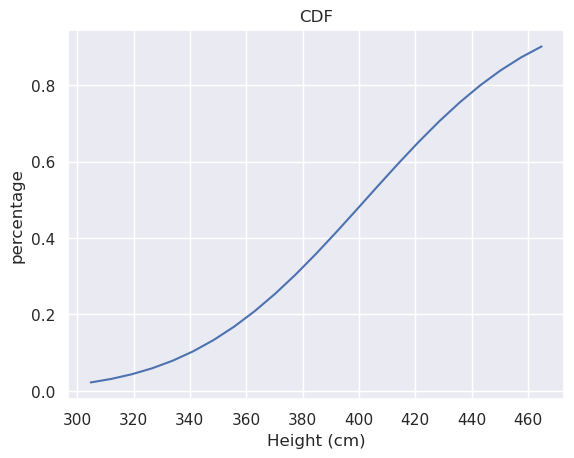

In [18]:
# Get Standard Deviation and Mean

heights_std = np.std(heights)
heights_mean = np.mean(heights)

# Plot Normal CDF
def plot_normal_CDF(data,mean,std,label,title):
    sns.set()
    # CDF of the data
    x = np.linspace(min(data),max(data),len(data))
    cdf = stats.norm.cdf(x,mean,std)
    
    plt.plot(x,cdf)
    plt.xlabel(label)
    plt.ylabel('percentage')
    plt.title(title)
    plt.show()
    return x,cdf

# CDF of Versicolor
x_cdf, y_cdf = plot_normal_CDF(heights, heights_mean, heights_std, "Height (cm)","CDF")

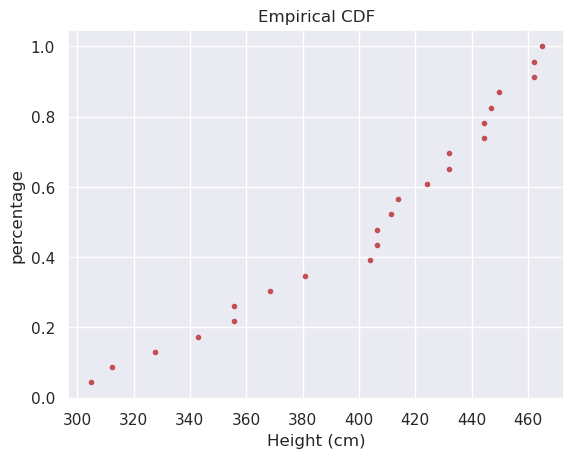

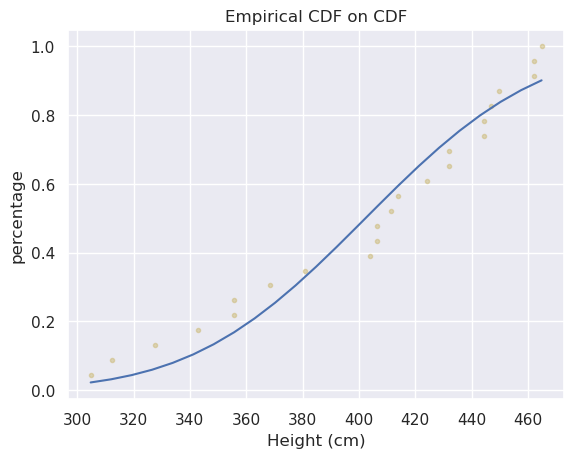

/tmp/ipykernel_95/2748975887.py:45: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heights,hist=False)


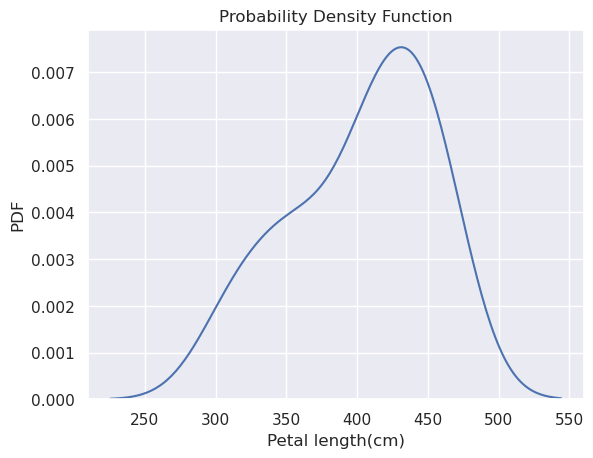

In [19]:
# Create a function to get x, y for of ecdf
def get_ecdf(data):
    
    # Get lenght of the data into n
    n = len(data)
    
    # We need to sort the data
    x = np.sort(data)
    
    # the function will show us cumulative percentages of corresponding data points
    y = np.arange(1,n+1)/n
    
    return x,y

# Create a function to plot ecdf
def plot_ecdf(data,labelx,labely,title,color):
    """Plot ecdf"""
    # Call get_ecdf function and assign the returning values
    x, y = get_ecdf(data)
    
    plt.plot(x,y,marker='.',linestyle='none',c=color)
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.title(title)

# Create a function overlay ECDF on CDF
def plot_overlay_ecdf(data,labelx,labely,title,color,x_cdf, y_cdf):
    x, y = get_ecdf(data)
    
    plt.plot(x,y,marker='.',linestyle='none',c=color,alpha=0.5)
    plt.plot(x_cdf, y_cdf)
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.title(title)
    
# Plotting Empirical CDF
plot_ecdf(heights,"Height (cm)","percentage","Empirical CDF","r")
plt.show()

# Overlap Empirical CDF on CDF
plot_overlay_ecdf(heights,"Height (cm)","percentage","Empirical CDF on CDF","y",x_cdf, y_cdf)
plt.show()

# Plotting PDF
sns.distplot(heights,hist=False)
plt.xlabel("Petal length(cm)")
plt.ylabel("PDF")
plt.title("Probability Density Function")
plt.show()

## Bootstrapping

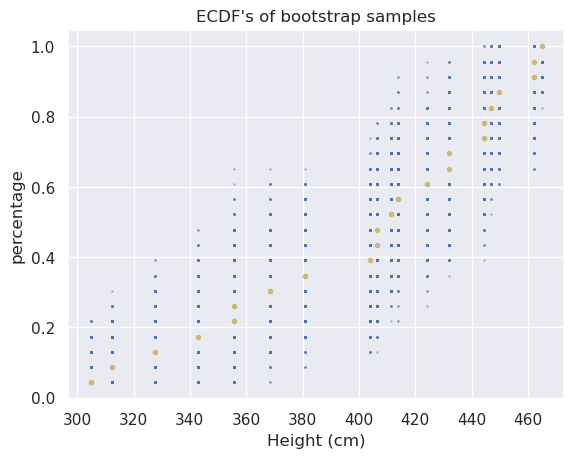

In [20]:
# Plot our original sample ecdf
plot_ecdf(heights,"Height (cm)","percentage","ECDF's of bootstrap samples","y")

for i in range(1000):
    
    # Generate a bootstrap sample
    bs_sample_heights = np.random.choice(heights,size=len(heights))
    
    # Plot ecdf for bootstrap sample
    x, y = get_ecdf(bs_sample_heights)
    plt.scatter(x, y,s=1,c='b',alpha=0.3)
    
plt.show()

In [22]:
def draw_bs_replicates(data,func,size):
    """creates a bootstrap sample, computes replicates and returns replicates array"""
    # Create an empty array to store replicates
    bs_replicates = np.empty(size)
    
    # Create bootstrap replicates as much as size
    for i in range(size):
        # Create a bootstrap sample
        bs_sample = np.random.choice(data,size=len(data))
        # Get bootstrap replicate and append to bs_replicates
        bs_replicates[i] = func(bs_sample)
    
    return bs_replicates

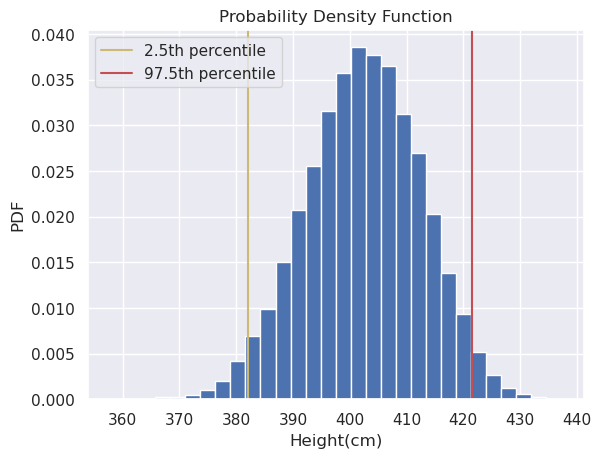

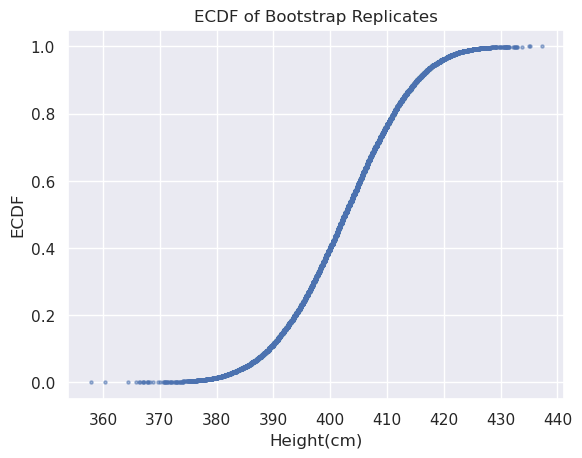

In [23]:
# Draw 10000 bootstrap replicates
bs_replicates_heights = draw_bs_replicates(heights,np.mean,15000)

# Plot probability density function
plt.hist(bs_replicates_heights,bins=30,density=True)
plt.axvline(x=np.percentile(bs_replicates_heights,[2.5]), ymin=0, ymax=1,label='2.5th percentile',c='y')
plt.axvline(x=np.percentile(bs_replicates_heights,[97.5]), ymin=0, ymax=1,label='97.5th percentile',c='r')
plt.xlabel("Height(cm)")
plt.ylabel("PDF")
plt.title("Probability Density Function")
plt.legend()
plt.show()

# Plot the ECDF of replicates
xsbs_ecdf, ysbs_ecdf = get_ecdf(bs_replicates_heights)
plt.scatter(xsbs_ecdf, ysbs_ecdf,s=5,c='b',alpha=0.5)
plt.xlabel("Height(cm)")
plt.ylabel("ECDF")
plt.title("ECDF of Bootstrap Replicates")
plt.show()

In [24]:
# Get the corresponding values of 2.5th and 97.5th percentiles
conf_interval = np.percentile(bs_replicates_heights,[2.5,97.5])

# Print the interval
print("The confidence interval: ",conf_interval)

The confidence interval:  [382.10434783 421.52956522]


What is the confidence interval 
We saw that the means are almost the same.
Now its time to find the 95% confidence interval. It is quite simple and straightforward. We just need the area between 2.5th - 97.5th percentiles.